In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/manishanker/Statistics_ML_26Aug/master/titanic_data.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Analyze Dataset

<AxesSubplot:xlabel='Survived', ylabel='count'>

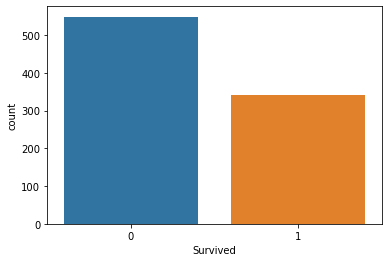

In [7]:
sns.countplot("Survived", data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

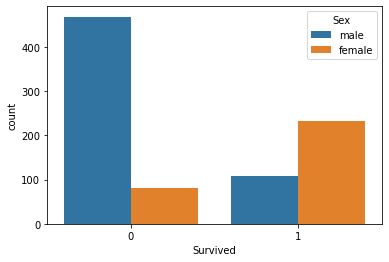

In [8]:
sns.countplot("Survived", hue="Sex", data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

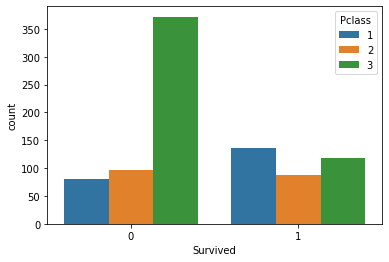

In [9]:
sns.countplot("Survived", hue="Pclass", data=df)

In [10]:
df.Age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

<AxesSubplot:ylabel='Frequency'>

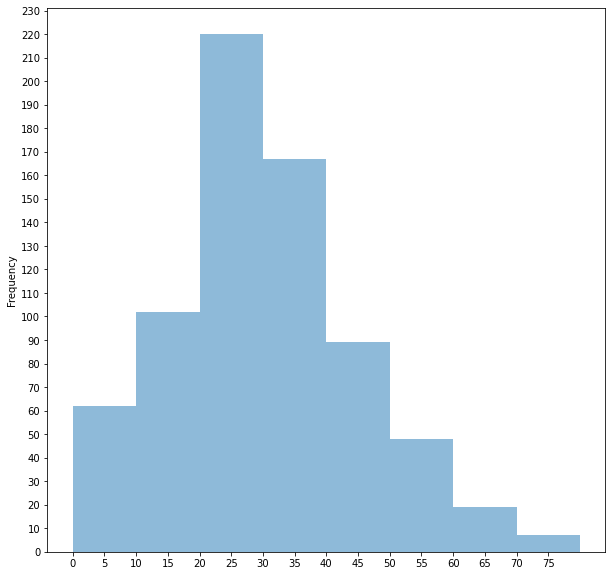

In [11]:
plt.xticks(range(0,80,5))
plt.yticks(range(0,500,10))
df["Age"].plot.hist(bins=[0,10,20,30,40,50,60,70,80],
                   figsize=(10,10), alpha=0.5)

In [12]:
df.drop("Cabin",axis=1, inplace=True)

In [13]:
df["Age"].mean()

29.69911764705882

In [14]:
df["Age"].median()

28.0

In [15]:
df["Age"] = df["Age"].fillna(df["Age"].median())

In [16]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [17]:
df["Embarked"].mode()

0    S
dtype: object

In [18]:
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode().values[0])

In [19]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<AxesSubplot:xlabel='Age'>

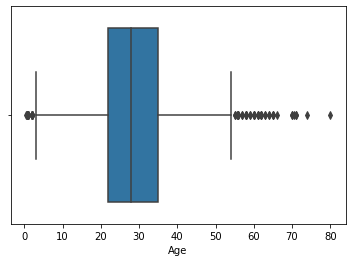

In [20]:
sns.boxplot(df["Age"], data=df)

<AxesSubplot:xlabel='Fare'>

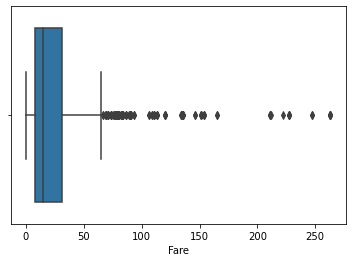

In [43]:
sns.boxplot(df["Fare"], data=df)

In [42]:
# Removing outliers
df.drop(df.loc[df["Fare"] > 400].index, axis=0, inplace=True)

## Removing Duplicates

In [44]:
df.duplicated().sum()
# features1=features.drop_duplicates()


0

In [45]:
sex = pd.get_dummies(df["Sex"], drop_first=False)
sex.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [46]:
pcl = pd.get_dummies(df["Pclass"], drop_first=False)
pcl.head()

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [48]:
embark = pd.get_dummies(df["Embarked"], prefix="Embarkdrop_first=False)

In [49]:
Parch = pd.get_dummies(df.Parch, prefix='Parch')

In [50]:
df_final = pd.concat([df, sex, pcl, embark, Parch], axis=1)

In [51]:
df_final.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embark_C,Embark_Q,Embark_S,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,1,1,0,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,1,0,0,1,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,1,1,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,1,1,0,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,1,1,0,0,0,0,0,0


In [52]:
df_final.drop(["PassengerId", "Name", "Sex", "Pclass", "Ticket", "Embarked", "Parch"], axis=1, inplace=True)

In [53]:
df_final.head()

,Survived,Age,SibSp,Fare,female,male,1,2,3,Embark_C,Embark_Q,Embark_S,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,0,22.0,1,7.2500,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0
1,1,38.0,1,71.2833,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0
2,1,26.0,0,7.9250,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0
3,1,35.0,1,53.1000,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0
4,0,35.0,0,8.0500,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0


In [54]:
df_final['SibSp'].value_counts()

0    605
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

### Test Train Split

In [55]:
X = df_final.drop(["Survived"], axis=1)
y = df_final["Survived"]

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=444)

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
X_train

,Age,SibSp,Fare,female,male,1,2,3,Embark_C,Embark_Q,Embark_S,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
593,28.0,0,7.7500,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0
699,42.0,0,7.6500,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0
310,24.0,0,83.1583,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0
56,21.0,0,10.5000,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0
736,48.0,1,34.3750,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,19.0,0,8.1583,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0
265,36.0,0,10.5000,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0
794,25.0,0,7.8958,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0
112,22.0,0,8.0500,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0


In [60]:
model = LogisticRegression(max_iter=1000)

In [61]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
predictions = model.predict(X_test)

In [63]:
from sklearn.metrics import classification_report

In [64]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       168
           1       0.75      0.74      0.74        99

    accuracy                           0.81       267
   macro avg       0.80      0.80      0.80       267
weighted avg       0.81      0.81      0.81       267



In [ ]:
y_test.value_counts()

In [65]:
from collections import Counter
Counter(predictions)

Counter({0: 170, 1: 97})

In [66]:
from sklearn.metrics import confusion_matrix

In [67]:
confusion_matrix(y_test, predictions)

array([[144,  24],
       [ 26,  73]], dtype=int64)

In [68]:
from sklearn.metrics import accuracy_score

In [69]:
accuracy_score(y_test, predictions)

0.8127340823970037

### Applying Standard Scaler

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
scaler = StandardScaler()

In [73]:
X_train_scaled = scaler.fit_transform(X_train)

In [74]:
model.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [77]:
X_test_scaled = scaler.transform(X_test)

In [79]:
predictions_scaled = model.predict(X_test_scaled)

In [80]:
print(classification_report(y_test, predictions_scaled))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       168
           1       0.74      0.74      0.74        99

    accuracy                           0.81       267
   macro avg       0.80      0.79      0.79       267
weighted avg       0.81      0.81      0.81       267



In [82]:
accuracy_score(y_test, predictions_scaled)

0.8089887640449438

In [86]:
mat = confusion_matrix(y_test, predictions_scaled)

Text(0.5, 1.0, 'Confusion Matrix')

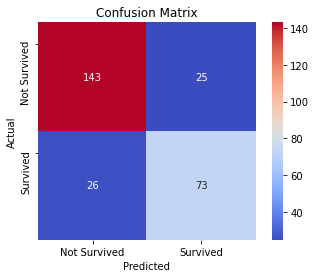

In [87]:
axes = sns.heatmap(mat, square=True, annot=True, fmt='d',
                     cbar=True, cmap=plt.cm.coolwarm)

class_labels = ["Not Survived", "Survived"]

axes.set_ylabel("Actual")
axes.set_xlabel("Predicted")

tick_marks = np.arange(len(class_labels)) + 0.5

axes.set_xticks(tick_marks)
axes.set_xticklabels(class_labels, rotation=0)

axes.set_yticks(tick_marks - 0.3)
axes.set_yticklabels(class_labels, rotation=90)

axes.set_title("Confusion Matrix")



In [ ]:
X_train

In [ ]:
scaled_col

In [ ]:
import sklearn
sklearn.__version__